In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

# 尺度分析

##### Metric
- Nominal:
按照「名稱」做分類


- Ordinal:
可以「計數」，可以做「排序」與「比較」。但是數值之間的計算是沒有意義的。

##### Non-metric
- Interval:
數值可以做排序跟比較外，還可以做「加減」。
可以計算「算術平均數」及「標準差」。

- Ratio:
有「絕對零點」，除了加減運算外，還可以「乘除」。

## Interval
資料來源: https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data

In [2]:
#檔案太大無法讀取，因為python 32bit只能到2G，所以要換成64bit
climate = pd.read_csv('./data/GlobalLandTemperaturesByCity.csv')
climate.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [3]:
#移除遺漏值
climate.dropna(axis=0, inplace=True)
climate.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
5,1744-04-01,5.788,3.624,Århus,Denmark,57.05N,10.33E
6,1744-05-01,10.644,1.283,Århus,Denmark,57.05N,10.33E
7,1744-06-01,14.051,1.347,Århus,Denmark,57.05N,10.33E
8,1744-07-01,16.082,1.396,Århus,Denmark,57.05N,10.33E


In [4]:
#遺漏值檢查
climate.isnull().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64

<AxesSubplot:>

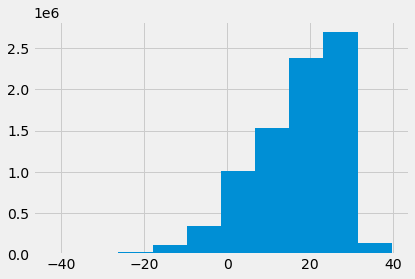

In [5]:
#關注AverageTemperature，溫度屬於interval
#繪製直方圖看溫度分布
climate['AverageTemperature'].hist()

In [6]:
#上圖所示，平均溫度大約落在20度
#實際觀察數值的平均溫度
climate['AverageTemperature'].describe()
#落在16.7度多

count    8.235082e+06
mean     1.672743e+01
std      1.035344e+01
min     -4.270400e+01
25%      1.029900e+01
50%      1.883100e+01
75%      2.521000e+01
max      3.965100e+01
Name: AverageTemperature, dtype: float64

In [7]:
#將dt轉換成datetime type
climate['dt'] = pd.to_datetime(climate['dt'])
climate['dt'].head()

0   1743-11-01
5   1744-04-01
6   1744-05-01
7   1744-06-01
8   1744-07-01
Name: dt, dtype: datetime64[ns]

In [8]:
#加入year(年)的數值
climate['year'] = climate['dt'].map(lambda value: value.year)
climate['year'].head()

0    1743
5    1744
6    1744
7    1744
8    1744
Name: year, dtype: int64

In [9]:
#只看美國的資料
climate_sub_us = climate.loc[climate['Country'] == 'United States']
climate_sub_us.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year
47555,1820-01-01,2.101,3.217,Abilene,United States,32.95N,100.53W,1820
47556,1820-02-01,6.926,2.853,Abilene,United States,32.95N,100.53W,1820
47557,1820-03-01,10.767,2.395,Abilene,United States,32.95N,100.53W,1820
47558,1820-04-01,17.989,2.202,Abilene,United States,32.95N,100.53W,1820
47559,1820-05-01,21.809,2.036,Abilene,United States,32.95N,100.53W,1820


In [10]:
#加入century(世紀)的資料
climate_sub_us['century'] = climate_sub_us['year'].map(lambda x:x//100+1)
climate_sub_us['century'].head()

<ipython-input-10-6fcf036402c9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climate_sub_us['century'] = climate_sub_us['year'].map(lambda x:x//100+1)


47555    19
47556    19
47557    19
47558    19
47559    19
Name: century, dtype: int64

array([[<AxesSubplot:title={'center':'18'}>,
        <AxesSubplot:title={'center':'19'}>],
       [<AxesSubplot:title={'center':'20'}>,
        <AxesSubplot:title={'center':'21'}>]], dtype=object)

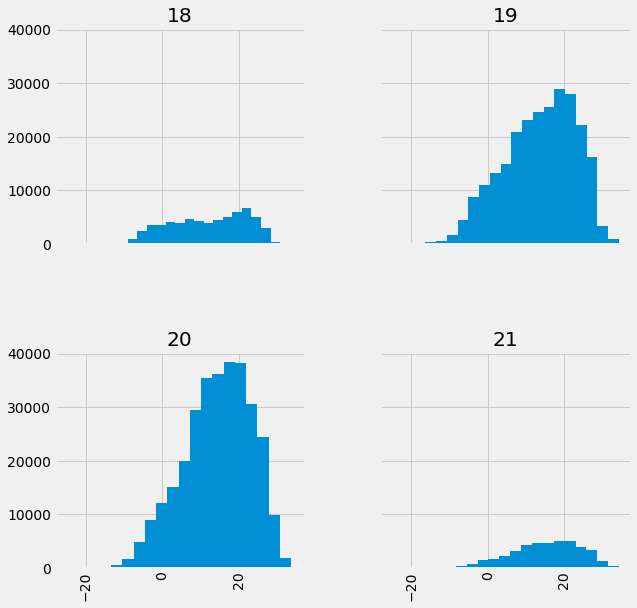

In [11]:
#用century行，對每個世紀畫直方圖
climate_sub_us['AverageTemperature'].hist(by=climate_sub_us['century'], sharex=True, sharey=True, figsize=(10,10), bins=20)

<AxesSubplot:xlabel='century'>

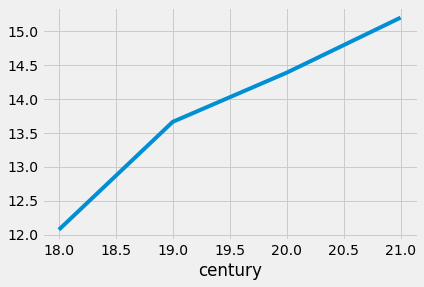

In [12]:
#觀察平均溫度是否隨世紀上升
climate_sub_us.groupby('century')['AverageTemperature'].mean().plot(kind='line')

In [13]:
#將溫度變化存到pandas的series物件中
century_changes = climate_sub_us.groupby('century')['AverageTemperature'].mean()
century_changes

century
18    12.073243
19    13.662870
20    14.386622
21    15.197692
Name: AverageTemperature, dtype: float64

In [14]:
#將21世紀與18世紀的溫度相減
century_changes[21] - century_changes[18]

3.124449115460754

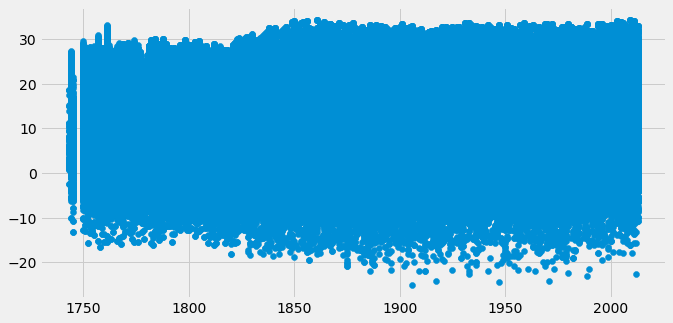

In [15]:
#繪製每天平均溫度散佈圖
x = climate_sub_us['year']
y = climate_sub_us['AverageTemperature']

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(x,y)
plt.show()

year
1743     5.818071
1744    13.858205
1745     4.039120
1750    12.456202
1751    13.140726
1752     5.843332
1753    11.894259
1754    12.099917
1755     9.320390
1756    12.290690
1757    11.407183
1758    11.784316
1759    12.565797
1760     9.874522
1761    12.423285
1762    11.908527
1763     9.697231
1764    11.923190
1765    11.426427
1766    12.383830
1767    11.036050
1768    11.894674
1769    12.378634
1770    12.626447
1771    13.479754
1772    12.087139
1773    13.317279
1774    11.557971
1775    13.717437
1776    12.035256
Name: AverageTemperature, dtype: float64

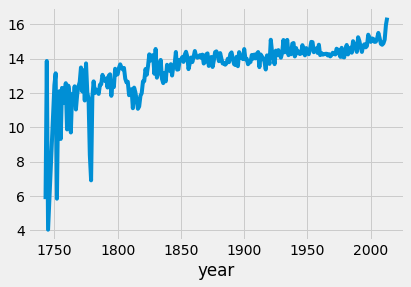

In [16]:
#繪製依照每年平均的平均溫度繪製趨勢圖
climate_sub_us.groupby('year').mean()['AverageTemperature'].plot()
climate_sub_us.groupby('year').mean()['AverageTemperature'].head(30)

year
1743          NaN
1744          NaN
1745          NaN
1750          NaN
1751          NaN
1752          NaN
1753          NaN
1754          NaN
1755          NaN
1756    10.076091
1757    10.635002
1758    10.427613
1759    11.280281
1760    11.022113
1761    10.950369
1762    11.556889
1763    11.337186
1764    11.319513
1765    11.530117
1766    11.539431
1767    11.502317
1768    11.513353
1769    11.494637
1770    11.769829
1771    11.875476
1772    11.893337
1773    12.255342
1774    12.218820
1775    12.447921
1776    12.413064
Name: AverageTemperature, dtype: float64

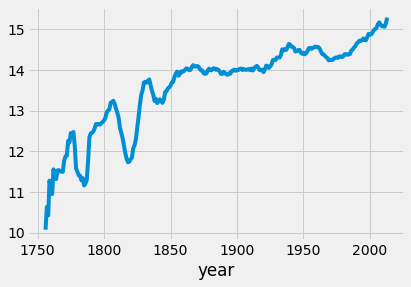

In [17]:
#移動平均平滑圖像
climate_sub_us.groupby('year').mean()['AverageTemperature'].rolling(10).mean().plot()
climate_sub_us.groupby('year').mean()['AverageTemperature'].rolling(10).mean().head(30)